###### Project Overview

This project was meant to be a study project, like an MVP of what a real project involving data and machine learning should look like. The dataset has some gaps, as it is not abundant and lacks diverse features to make the dataframe denser.

While studying how to set up machine learning for this project, I realized it could be trickier than expected. With the current dataset, the models can only provide "shallow" predictions. I had to make a choice: either continue the MVP as it is, or make the dataset richer by adding neighborhood scores based on nearby points of interest, such as hospitals, supermarkets, shopping centers, parks, and beaches (as it should be).

Although enriching the dataset is tempting, I chose to continue with the MVP as it is for my first project. This way, I can complete a functional project while continuing to deepen my understanding of machine learning. From my initial studies of what ML really is, I realized that using a ready-made model is simple, but truly understanding how it works mathematically—and recognizing that preprocessing the data is equally important, as it directly affects model performance—will be the focus of my future GitHub projects.

##### **Notebook Overview**

**In this notebook, I will show the usage and how to set up two different models (Linear Regression and Decision Trees) using Scikit-Learn, and Matplotlib to plot the results and help explain them.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 

Loading our csv file in a pandas data frame.

In [2]:
plt.close("all")
catalogFilePath = os.path.join("..","data", "catalog.csv")
catalog = pd.read_csv(catalogFilePath)
#Quick way to remember the content of our dataset
display(catalog[["total_monthly_value", "property_size"]].head(5))

,total_monthly_value,property_size
0,4201,67
1,1560,50
2,4039,72
3,1513,79
4,3000,80


### Linear Regression Model ::

The linear regression model uses the y = mx + c approach, for a dependent variable Y, it finds a relationship with one or more independent variables X. This is capable, because the model analyzes correlations between X and Y in the dataset, than the model fits a straight line to the data points in the XY plane. This line can then be used to predict future values of Y from new X values.


The first step by setting up this model it's to select the Dependent and Independent variables, y and x, that in our case will be, the base rent and the m² of the property.

Text(0, 0.5, 'property size')

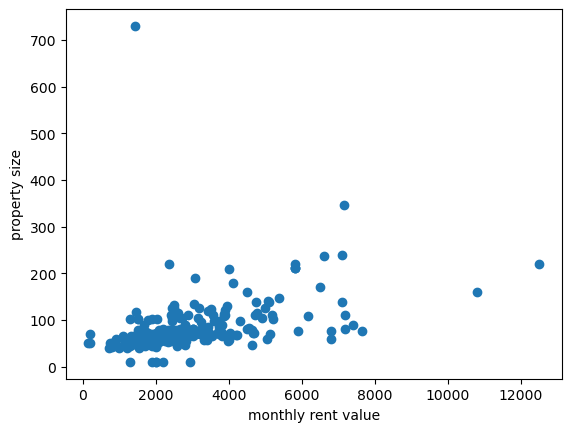

In [3]:
X = catalog[["total_monthly_value"]]
y = catalog[["property_size"]]
plt.scatter(X, y)
plt.xlabel("monthly rent value")
plt.ylabel("property size")

As we can see, we got some outliers, which are data points that are in a large discrepancy whitin the others in the same range, also we've got an BASE trend difference, this is, the X values and y values starts to be more and more distant, and both of these things are not great for the model to predict. Because, the outliers can do the regression line start to superestimate or subestimate due the large discrepancy, and the base trend difference between X,y breaks the assumption that the errors are evenly distributed. This makes the model less reliable, since its predictions will be accurate only in a certain range but fail for higher or lower values. 


Then, we will need to add up a step in the linear regression model, the preprocessing step, i chose to use the QuantileTransformer as it was the one used in the freecodecamp scikit-learn crash course that i took. The Quantile aproach transforms features using quantiles information. This method transforms the features to follow a uniform or a normal distribution.
###### (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) for more information.

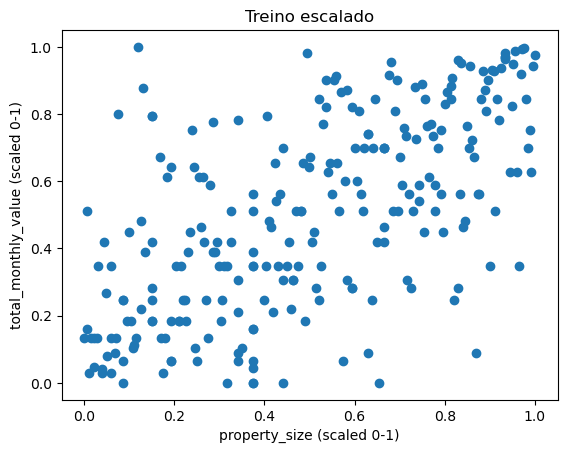

In [4]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression

x_adpt = X.values.reshape(-1, 1)
y_adpt = y.values.reshape(-1, 1)

#Scaling X  with QuantileTransformer
# n_quantiles = number of training samples (prevents warnings)
# output_distribution='uniform' -> transforms data to be between 0 and 1
qauntilet_X = QuantileTransformer(n_quantiles=len(x_adpt), output_distribution='uniform')
X_scaled = qauntilet_X.fit_transform(x_adpt)

quantilet_y = QuantileTransformer(n_quantiles=len(y_adpt), output_distribution='uniform')
y_scaled = quantilet_y.fit_transform(y_adpt)

plt.scatter(X_scaled, y_scaled)
plt.xlabel("property_size (scaled 0-1)")
plt.ylabel("total_monthly_value (scaled 0-1)")
plt.title("Treino escalado")
plt.show()



In the plot its visible a pattern forming, almost intuitively we can see it. 

The next step is setting up the our first prediction

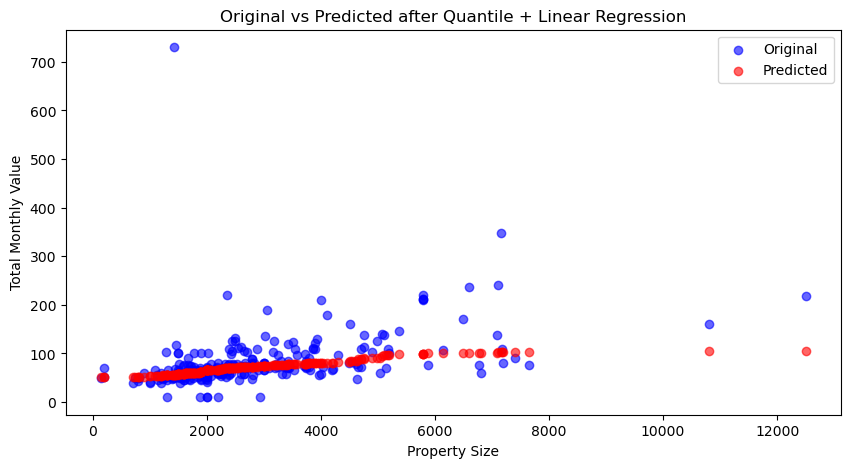

In [5]:
LR = LinearRegression()
LR.fit(X_scaled, y_scaled.ravel())

# --- Predict and inverse transform to original scale ---
y_pred_scaled = LR.predict(X_scaled)
y_pred = quantilet_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

# --- Plot original vs predicted ---
plt.figure(figsize=(10,5))

# Original data
plt.scatter(x_adpt, y_adpt, color='blue', alpha=0.6, label='Original')

# Predicted data
plt.scatter(x_adpt, y_pred, color='red', alpha=0.6, label='Predicted')

plt.xlabel("Property Size")
plt.ylabel("Total Monthly Value")
plt.title("Original vs Predicted after Quantile + Linear Regression")
plt.legend()
plt.show()